## highs & lows for pred4

In [1]:
import pandas as pd

data4 = pd.read_csv('data_sample_three_years.csv')

data4 = data4.iloc[:, [0,1,2,3,4]]
data4.rename(columns={'date': 'open', 'low':'close', 'open':'high', 'high':'low'}, inplace=True)

data4['date'] = pd.to_datetime(data4['timestamp'], unit='s')
data4 = data4.iloc[:, [0,5,1,2,3,4]]

data_backup4 = data4.loc[ data4.timestamp >= 1675814400 ]
data4 = data4.loc[ data4.timestamp < 1675814400 ]

from talib import RSI
data4['rsi_14'] = RSI(data4['close'], timeperiod=14)
data4['rsi_30'] = RSI(data4['close'], timeperiod=30)

from talib import MA, SMA, EMA
data4['ma_9'] = MA(data4['close'], timeperiod=9)
data4['ma_52'] = MA(data4['close'], timeperiod=52)

for i in range(1,11):
    data4[f'high+{i}'] = data4['high'].shift(i)
for i in range(1,11):
    data4[f'low+{i}'] = data4['low'].shift(i)
data4.dropna(axis=0, inplace=True)

In [2]:
inputs4_highs = data4.iloc[:, [6,7,8,9,10,11,12,13,14,15,16,17,18,19]]
target4_highs = data4.iloc[:, [3]]

inputs4_lows = data4.iloc[:, [6,7,8,9,20,21,22,23,24,25,26,27,28,29]]
target4_lows = data4.iloc[:, [4]]

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

X_train4_h, X_test4_h, y_train4_h, y_test4_h = train_test_split(inputs4_highs, target4_highs, test_size=0.2, random_state=1, shuffle=False)
X_train4_l, X_test4_l, y_train4_l, y_test4_l = train_test_split(inputs4_lows, target4_lows, test_size=0.2, random_state=1, shuffle=False)

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler4_h = MinMaxScaler()
scaler4_h.fit(X_train4_h)
scaler4_l = MinMaxScaler()
scaler4_l.fit(X_train4_l)

X_train4_h_scaled = scaler4_h.transform(X_train4_h)
X_test4_h_scaled = scaler4_h.transform(X_test4_h)

X_train4_l_scaled = scaler4_l.transform(X_train4_l)
X_test4_l_scaled = scaler4_l.transform(X_test4_l)

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import xgboost

2024-03-01 08:02:08.858594: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-01 08:02:09.876092: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-01 08:02:09.876386: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-01 08:02:10.038824: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-01 08:02:10.390726: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-01 08:02:15.111903: W tensorflow/compiler/tf2tensorrt/utils/py_utils.

In [6]:
# Define and train the LSTM model
model4_h = Sequential([
    Dense(64, activation='relu', input_shape=(14,)),  # Input layer with 10 features
    Dense(64, activation='relu'),                     # Hidden layer with 64 units
    Dense(1)                                          # Output layer with 1 unit for regression
])

# Compile the model
model4_h.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error loss for regression

# Train the model
model4_h.fit(X_train4_h_scaled, y_train4_h, epochs=100, batch_size=32)

Epoch 1/100
406/406 [==============================] - 2s 3ms/step - loss: 4752452.0000
Epoch 2/100
406/406 [==============================] - 1s 2ms/step - loss: 17553.7715
Epoch 3/100
406/406 [==============================] - 1s 3ms/step - loss: 13692.3926
Epoch 4/100
406/406 [==============================] - 1s 2ms/step - loss: 12037.1240
Epoch 5/100
406/406 [==============================] - 1s 3ms/step - loss: 10537.3252
Epoch 6/100
406/406 [==============================] - 1s 2ms/step - loss: 8861.8594
Epoch 7/100
406/406 [==============================] - 1s 3ms/step - loss: 6377.7852
Epoch 8/100
406/406 [==============================] - 1s 2ms/step - loss: 4246.8013
Epoch 9/100
406/406 [==============================] - 1s 2ms/step - loss: 2754.0386
Epoch 10/100
406/406 [==============================] - 1s 3ms/step - loss: 1850.8273
Epoch 11/100
406/406 [==============================] - 1s 3ms/step - loss: 1397.2946
Epoch 12/100
406/406 [==============================] - 

In [7]:
# Define and train the LSTM model
model4_l = Sequential([
    Dense(64, activation='relu', input_shape=(14,)),  # Input layer with 10 features
    Dense(64, activation='relu'),                     # Hidden layer with 64 units
    Dense(1)                                          # Output layer with 1 unit for regression
])

# Compile the model
model4_l.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error loss for regression

# Train the model
model4_l.fit(X_train4_l_scaled, y_train4_l, epochs=100, batch_size=32)

Epoch 1/100
406/406 [==============================] - 2s 4ms/step - loss: 5139434.0000
Epoch 2/100
406/406 [==============================] - 2s 4ms/step - loss: 25281.2734
Epoch 3/100
406/406 [==============================] - 2s 4ms/step - loss: 11878.2256
Epoch 4/100
406/406 [==============================] - 1s 3ms/step - loss: 10160.6055
Epoch 5/100
406/406 [==============================] - 1s 3ms/step - loss: 8010.3247
Epoch 6/100
406/406 [==============================] - 1s 3ms/step - loss: 5550.2046
Epoch 7/100
406/406 [==============================] - 1s 3ms/step - loss: 3465.1746
Epoch 8/100
406/406 [==============================] - 2s 5ms/step - loss: 2290.7913
Epoch 9/100
406/406 [==============================] - 3s 8ms/step - loss: 1846.9670
Epoch 10/100
406/406 [==============================] - 2s 5ms/step - loss: 1730.4481
Epoch 11/100
406/406 [==============================] - 1s 3ms/step - loss: 1693.0574
Epoch 12/100
406/406 [==============================] - 2

In [8]:
pred4_highs = model4_h.predict(X_test4_h_scaled)
y_test4_h['pred'] = pred4_highs.reshape(1,-1)[0]

pred4_lows = model4_l.predict(X_test4_l_scaled)
y_test4_l['pred'] = pred4_lows.reshape(1,-1)[0]

102/102 [==============================] - 0s 3ms/step


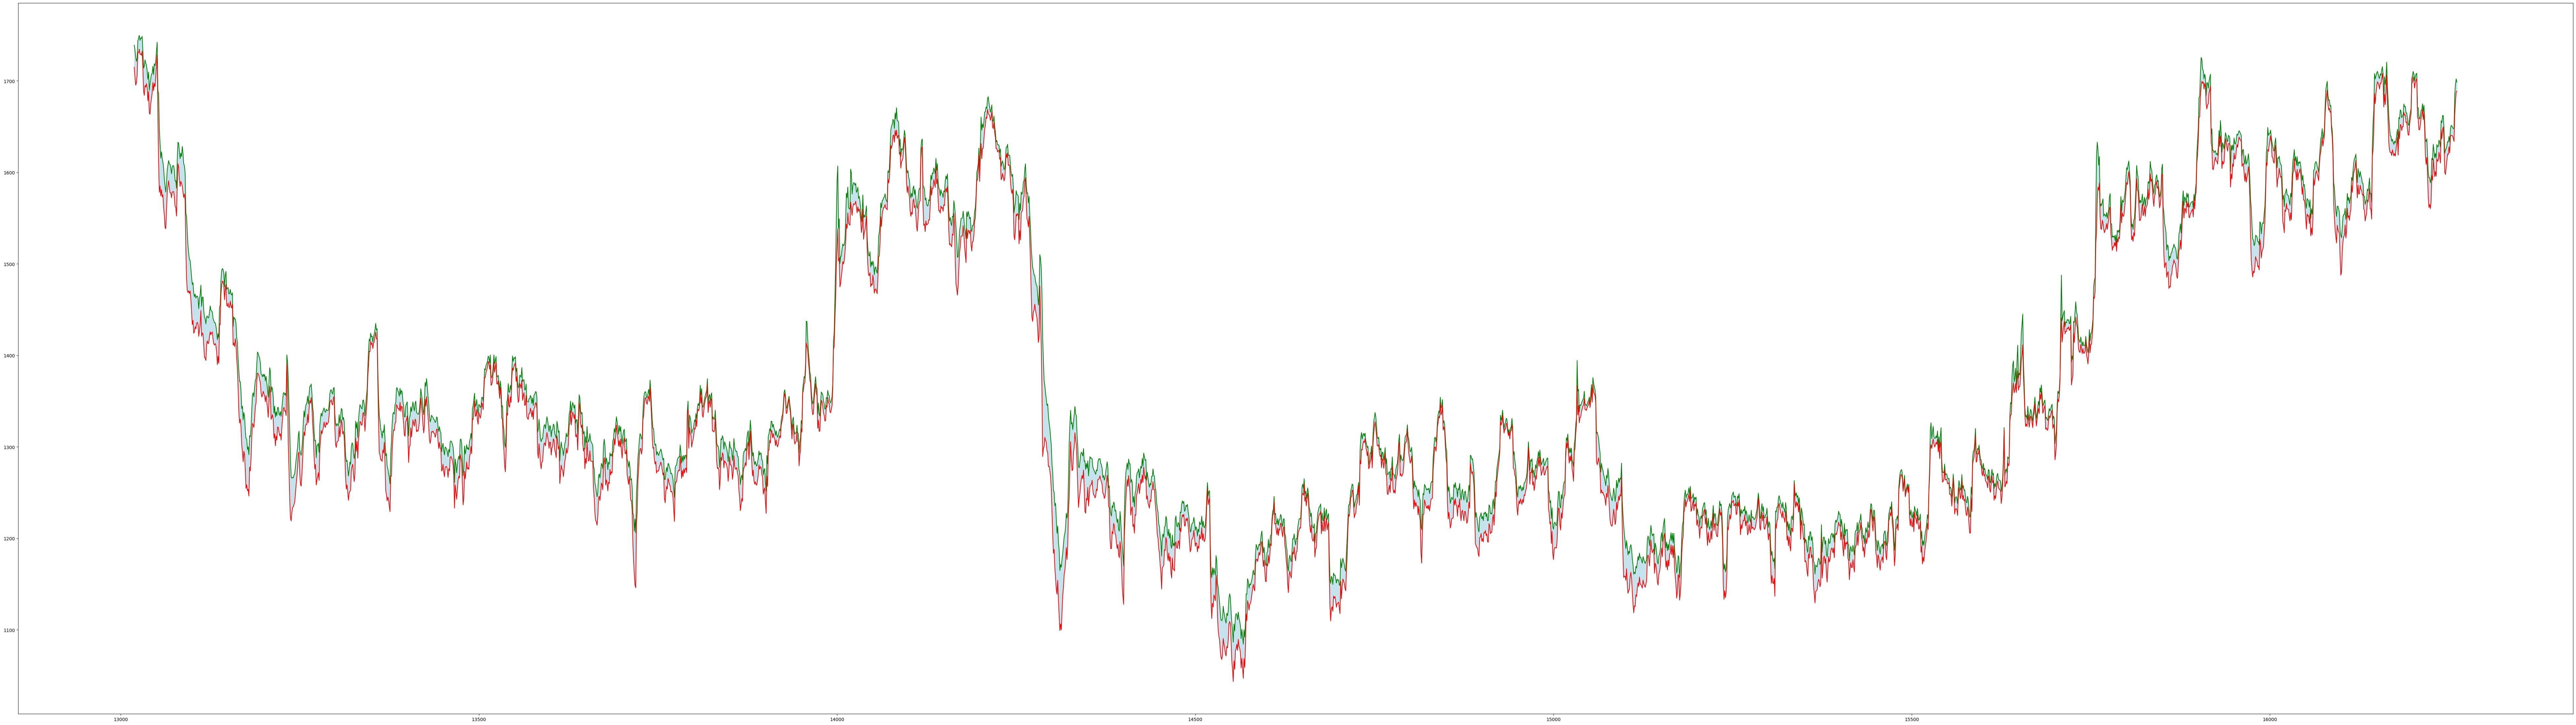

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 28))

x = y_test4_h.index

plt.plot(y_test4_h['pred'], color='green')
plt.plot(y_test4_l['pred'], color='red')
plt.fill_between(x, y_test4_h['pred'], y_test4_l['pred'], color='lightblue', alpha=0.7)
plt.show()

## pred4 with backup data

In [10]:
from talib import RSI
data_backup4['rsi_14'] = RSI(data_backup4['close'], timeperiod=14)
data_backup4['rsi_30'] = RSI(data_backup4['close'], timeperiod=30)

from talib import MA, SMA, EMA
data_backup4['ma_9'] = MA(data_backup4['close'], timeperiod=9)
data_backup4['ma_52'] = MA(data_backup4['close'], timeperiod=52)

for i in range(1,11):
    data_backup4[f'high+{i}'] = data_backup4['high'].shift(i)
for i in range(1,11):
    data_backup4[f'low+{i}'] = data_backup4['low'].shift(i)
data_backup4.dropna(axis=0, inplace=True)

inputs4_backup_highs = data_backup4.iloc[:, [6,7,8,9,10,11,12,13,14,15,16,17,18,19]]
target4_backup_highs = data_backup4.iloc[:, [3]]

inputs4_backup_lows = data_backup4.iloc[:, [6,7,8,9,20,21,22,23,24,25,26,27,28,29]]
target4_backup_lows = data_backup4.iloc[:, [4]]

inputs_backup4_highs_scaled = scaler4_h.transform(inputs4_backup_highs)
inputs_backup4_lows_scaled = scaler4_l.transform(inputs4_backup_lows)

pred_backup4_highs = model4_h.predict(inputs_backup4_highs_scaled)
pred_backup4_lows = model4_l.predict(inputs_backup4_lows_scaled)

252/252 [==============================] - 1s 3ms/step


In [11]:
raw_data4_backup = data_backup4.iloc[:, [0,1,2,3,4,5,6,7,8,9]]
raw_data4_backup['pred_highs'] = pred_backup4_highs
raw_data4_backup['pred_highs'] = raw_data4_backup['pred_highs'].shift(1)
raw_data4_backup['pred_lows'] = pred_backup4_lows
raw_data4_backup['pred_lows'] = raw_data4_backup['pred_lows'].shift(1)

/tmp/ipykernel_1292654/4291074119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data4_backup['pred_highs'] = pred_backup4_highs
/tmp/ipykernel_1292654/4291074119.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data4_backup['pred_highs'] = raw_data4_backup['pred_highs'].shift(1)
/tmp/ipykernel_1292654/4291074119.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [12]:
raw_data4_backup.to_excel('raw_data_4_highs_lows.xlsx')

## prediction with 30 previous bars

In [13]:
import pandas as pd

data = pd.read_csv('data_sample_three_years.csv')

data = data.iloc[:, [0,1,2,3,4]]
data.rename(columns={'date': 'open', 'low':'close', 'open':'high', 'high':'low'}, inplace=True)

data['date'] = pd.to_datetime(data['timestamp'], unit='s')
data = data.iloc[:, [0,5,1,2,3,4]]

data_backup = data.loc[ data.timestamp >= 1675814400 ]
data = data.loc[ data.timestamp < 1675814400 ]

from talib import RSI
data['rsi_14'] = RSI(data['close'], timeperiod=14)
data['rsi_30'] = RSI(data['close'], timeperiod=30)

from talib import MA, SMA, EMA
data['ma_9'] = MA(data['close'], timeperiod=9)
data['ma_52'] = MA(data['close'], timeperiod=52)

for i in range(1,31):
    data[f'high+{i}'] = data['high'].shift(i)
for i in range(1,31):
    data[f'low+{i}'] = data['low'].shift(i)
data.dropna(axis=0, inplace=True)

In [14]:
inputs_highs = data.iloc[:, [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]]
target_highs = data.iloc[:, [3]]

inputs_lows = data.iloc[:, [6,7,8,9,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69]]
target_lows = data.iloc[:, [4]]

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(inputs_highs, target_highs, test_size=0.2, random_state=1, shuffle=False)
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(inputs_lows, target_lows, test_size=0.2, random_state=1, shuffle=False)

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_h = MinMaxScaler()
scaler_h.fit(X_train_h)
scaler_l = MinMaxScaler()
scaler_l.fit(X_train_l)

X_train_h_scaled = scaler_h.transform(X_train_h)
X_test_h_scaled = scaler_h.transform(X_test_h)

X_train_l_scaled = scaler_l.transform(X_train_l)
X_test_l_scaled = scaler_l.transform(X_test_l)

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import xgboost

In [18]:
# Define and train the LSTM model
model_h = Sequential([
    Dense(64, activation='relu', input_shape=(34,)),  # Input layer with 10 features
    Dense(64, activation='relu'),                     # Hidden layer with 64 units
    Dense(1)                                          # Output layer with 1 unit for regression
])

# Compile the model
model_h.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error loss for regression

# Train the model
model_h.fit(X_train_h_scaled, y_train_h, epochs=500, batch_size=32)

Epoch 1/500
406/406 [==============================] - 2s 4ms/step - loss: 4381843.0000
Epoch 2/500
406/406 [==============================] - 2s 5ms/step - loss: 64923.1797
Epoch 3/500
406/406 [==============================] - 2s 5ms/step - loss: 43153.3555
Epoch 4/500
406/406 [==============================] - 2s 5ms/step - loss: 22896.8242
Epoch 5/500
406/406 [==============================] - 2s 4ms/step - loss: 11354.4648
Epoch 6/500
406/406 [==============================] - 2s 4ms/step - loss: 7190.1401
Epoch 7/500
406/406 [==============================] - 3s 6ms/step - loss: 5920.9995
Epoch 8/500
406/406 [==============================] - 2s 5ms/step - loss: 5170.1777
Epoch 9/500
406/406 [==============================] - 2s 4ms/step - loss: 4510.1313
Epoch 10/500
406/406 [==============================] - 2s 4ms/step - loss: 3896.5867
Epoch 11/500
406/406 [==============================] - 2s 4ms/step - loss: 3362.5203
Epoch 12/500
406/406 [==============================] - 

In [19]:
# Define and train the LSTM model
model_l = Sequential([
    Dense(64, activation='relu', input_shape=(34,)),  # Input layer with 10 features
    Dense(64, activation='relu'),                     # Hidden layer with 64 units
    Dense(1)                                          # Output layer with 1 unit for regression
])

# Compile the model
model_l.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error loss for regression

# Train the model
model_l.fit(X_train_l_scaled, y_train_l, epochs=500, batch_size=32)

Epoch 1/500
406/406 [==============================] - 3s 4ms/step - loss: 4308301.0000
Epoch 2/500
406/406 [==============================] - 1s 3ms/step - loss: 57852.2734
Epoch 3/500
406/406 [==============================] - 2s 5ms/step - loss: 38673.0430
Epoch 4/500
406/406 [==============================] - 1s 4ms/step - loss: 21246.9395
Epoch 5/500
406/406 [==============================] - 1s 3ms/step - loss: 10560.0371
Epoch 6/500
406/406 [==============================] - 2s 5ms/step - loss: 6177.4097
Epoch 7/500
406/406 [==============================] - 2s 5ms/step - loss: 4885.9780
Epoch 8/500
406/406 [==============================] - 2s 5ms/step - loss: 3986.0625
Epoch 9/500
406/406 [==============================] - 2s 6ms/step - loss: 3360.6875
Epoch 10/500
406/406 [==============================] - 1s 4ms/step - loss: 3003.8232
Epoch 11/500
406/406 [==============================] - 2s 4ms/step - loss: 2804.6699
Epoch 12/500
406/406 [==============================] - 

In [20]:
pred_highs = model_h.predict(X_test_h_scaled)
y_test_h['pred'] = pred_highs.reshape(1,-1)[0]

pred_lows = model_l.predict(X_test_l_scaled)
y_test_l['pred'] = pred_lows.reshape(1,-1)[0]

102/102 [==============================] - 0s 2ms/step


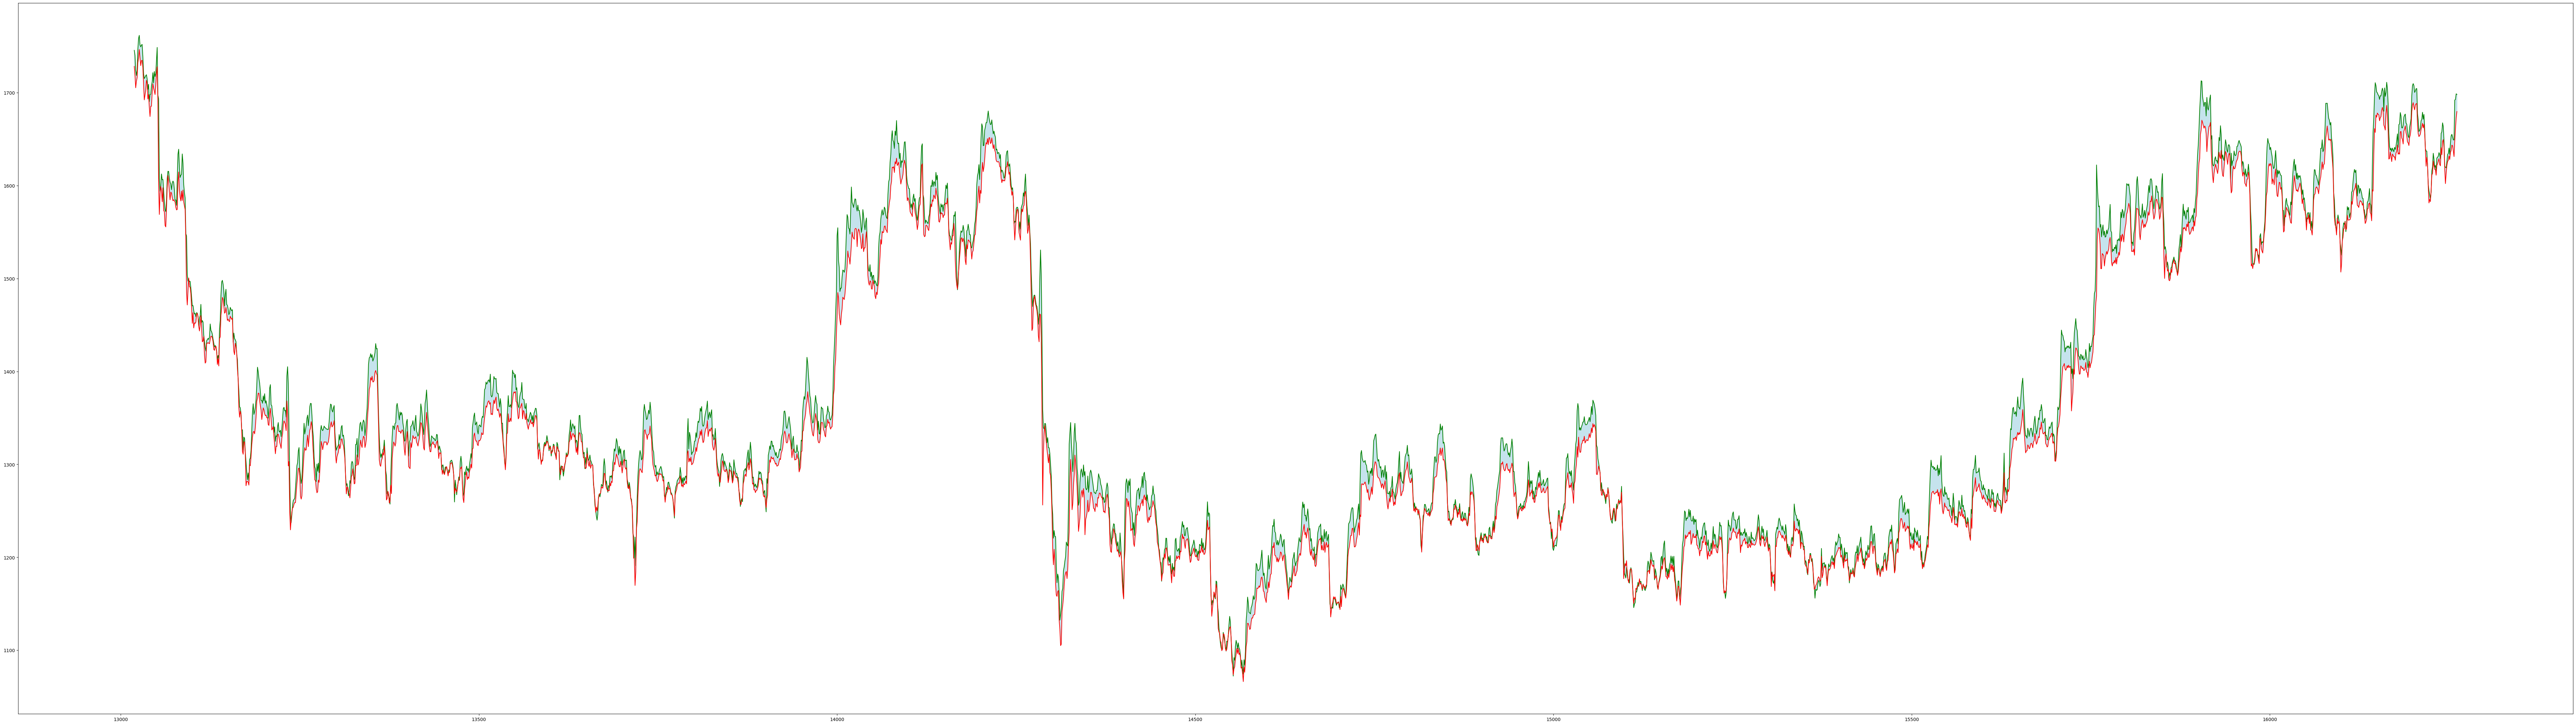

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 28))

x = y_test_h.index

plt.plot(y_test_h['pred'], color='green')
plt.plot(y_test_l['pred'], color='red')
plt.fill_between(x, y_test_h['pred'], y_test_l['pred'], color='lightblue', alpha=0.7)
plt.show()

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(200, 48))

x = y_test_h.index

plt.plot(data['close'], color='black')
plt.plot(y_test_h['pred'], color='green')
plt.plot(y_test_l['pred'], color='red')
plt.fill_between(x, y_test_h['pred'], y_test_l['pred'], color='lightblue', alpha=0.7)
plt.show()

## prediction with backup data

In [23]:
from talib import RSI
data_backup['rsi_14'] = RSI(data_backup['close'], timeperiod=14)
data_backup['rsi_30'] = RSI(data_backup['close'], timeperiod=30)

from talib import MA, SMA, EMA
data_backup['ma_9'] = MA(data_backup['close'], timeperiod=9)
data_backup['ma_52'] = MA(data_backup['close'], timeperiod=52)

for i in range(1,31):
    data_backup[f'high+{i}'] = data_backup['high'].shift(i)
for i in range(1,31):
    data_backup[f'low+{i}'] = data_backup['low'].shift(i)
data_backup.dropna(axis=0, inplace=True)

inputs_backup_highs = data_backup.iloc[:, [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]]
target_backup_highs = data_backup.iloc[:, [3]]

inputs_backup_lows = data_backup.iloc[:, [6,7,8,9,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69]]
target_backup_lows = data_backup.iloc[:, [4]]

inputs_backup_highs_scaled = scaler_h.transform(inputs_backup_highs)
inputs_backup_lows_scaled = scaler_l.transform(inputs_backup_lows)

pred_backup_highs = model_h.predict(inputs_backup_highs_scaled)
pred_backup_lows = model_l.predict(inputs_backup_lows_scaled)

252/252 [==============================] - 1s 2ms/step


In [24]:
raw_data_backup = data_backup.iloc[:, [0,1,2,3,4,5,6,7,8,9]]
raw_data_backup['pred_highs'] = pred_backup_highs
raw_data_backup['pred_highs'] = raw_data_backup['pred_highs'].shift(1)
raw_data_backup['pred_lows'] = pred_backup_lows
raw_data_backup['pred_lows'] = raw_data_backup['pred_lows'].shift(1)

/tmp/ipykernel_1292654/3210575045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_backup['pred_highs'] = pred_backup_highs
/tmp/ipykernel_1292654/3210575045.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_backup['pred_highs'] = raw_data_backup['pred_highs'].shift(1)
/tmp/ipykernel_1292654/3210575045.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [25]:
raw_data_backup.to_excel('raw_data_highs_lows_2_500iteration_sigmoid.xlsx')